## Mount Google Drive to Google Colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 4. Inference

## 4.1. Import the necessary libraries

In [1]:
import torch
import torch.nn as nn
from torchvision import models,transforms

from PIL import Image

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import copy
import os

## 4.2 Set the model, label and data path 

In [2]:
# model_path = '/content/drive/Shared drives/AISC_Team4/dl_model.sav'
# model_path = '/content/drive/Shared drives/AISC_Team4/dl_model_v1_labels.csv'
# pre_data_dir = '/content/drive/Shared drives/AISC_Team4//PlantVillage/raw/color/'

model_path = os.getcwd()+'/dl_model_v1_4inf.sav'
labels_path = os.getcwd()+'/dl_model_v1_labels.csv'
pre_data_dir = os.getcwd()+'/PlantVillage/raw/color/'

## 4.3. Restore model for inference

In [3]:
def initialize_alexnet(model_name, num_classes, feature_extract=True, use_pretrained=True):

  model_ft = None
  input_size = 0

  if model_name == "alexnet":
    model_ft = models.alexnet(pretrained=use_pretrained)

    # Freeze the weigths of the network if feauture_extract flag is True 
    if feature_extract:
        for param in model_ft.parameters():
            param.requires_grad = False
    
    # Reshape the last layer of the model: FC7(4096 neurons) --> FC8(38 neurons)
    # By default, require_grads is True for this new layer
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)

    # AlexNet requires the input size to be (224,224)
    input_size = 224
  else:
        print("Invalid model name!")
        exit()

  return model_ft,input_size


model, _ = initialize_alexnet("alexnet", num_classes=38)
model.load_state_dict(torch.load(model_path))
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 4.4. Read the labels file

In [4]:
labels_df = pd.read_csv(labels_path, header=None, names=['idx','Label'])
labels_dict = dict(zip(labels_df.idx, labels_df.Label))

## 4.5. Prediction


In [5]:
def prediction(img):
    """
    img : is an image conforms to PIL image format
    It returns the label index predicted by model
    """
    transform = transforms.Compose([            
    transforms.Resize(256),                    
    transforms.CenterCrop(224),                
    transforms.ToTensor(),                     
    transforms.Normalize(                      
    mean=[0.485, 0.456, 0.406],                
    std=[0.229, 0.224, 0.225]                  
    )])

    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)  
    out = model(batch_t)
    _, index = torch.max(out, 1)
    # percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 
    # conf = percentage[index[0]].item()
    
    return index

def get_pred_label(labels_dict, idx=-1):
    """
    Return class label (plant_name, disease_name) having a valid index
    """
    if (idx>=0 and idx<=37):
        label = labels_dict[idx].split("___") 
    else:
        label = ['','']
    return label[0],label[1]

The label of this leaf is  Soybean___healthy


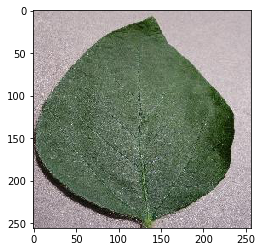

In [6]:
np.random.seed(42)

random_folder = np.random.choice(os.listdir(pre_data_dir))
random_leaf = np.random.choice(os.listdir(pre_data_dir+random_folder))
img = Image.open(pre_data_dir+ random_folder + '/'+random_leaf)
plt.imshow(img)
print('The label of this leaf is ', random_folder)

In [7]:
pred_idx = prediction(img)
plant_name, disease_name = get_pred_label(labels_dict, pred_idx.numpy()[0])
print('Predicted plant name = ', plant_name)
print('Predicted disease = ', disease_name)

Predicted plant name =  Soybean
Predicted disease =  healthy


The label of this leaf is  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


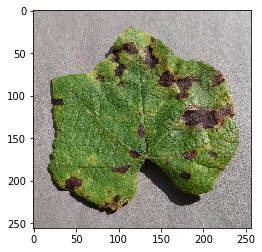

In [8]:
random_folder = np.random.choice(os.listdir(pre_data_dir))
random_leaf = np.random.choice(os.listdir(pre_data_dir+random_folder))
img = Image.open(pre_data_dir+ random_folder + '/'+random_leaf)
plt.imshow(img)
print('The label of this leaf is ', random_folder)

The label of this leaf is  Soybean___healthy


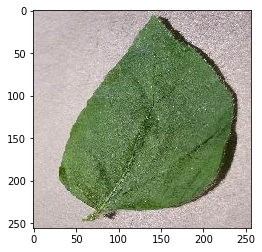

In [9]:
random_folder = np.random.choice(os.listdir(pre_data_dir))
random_leaf = np.random.choice(os.listdir(pre_data_dir+random_folder))
img = Image.open(pre_data_dir+ random_folder + '/'+random_leaf)
plt.imshow(img)
print('The label of this leaf is ', random_folder)

In [10]:
pred_idx = prediction(img)
plant_name, disease_name = get_pred_label(labels_dict, pred_idx.numpy()[0])
print('Predicted plant name = ', plant_name)
print('Predicted disease = ', disease_name)

Predicted plant name =  Soybean
Predicted disease =  healthy


The label of this leaf is  Raspberry___healthy


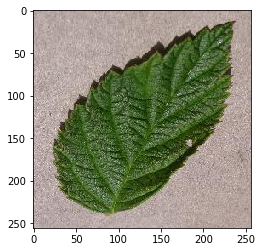

In [11]:
random_folder = np.random.choice(os.listdir(pre_data_dir))
random_leaf = np.random.choice(os.listdir(pre_data_dir+random_folder))
img = Image.open(pre_data_dir+ random_folder + '/'+random_leaf)
plt.imshow(img)
print('The label of this leaf is ', random_folder)

In [12]:
pred_idx = prediction(img)
plant_name, disease_name = get_pred_label(labels_dict, pred_idx.numpy()[0])
print('Predicted plant name = ', plant_name)
print('Predicted disease = ', disease_name)

Predicted plant name =  Raspberry
Predicted disease =  healthy
